In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people
ppl = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [12]:
print("Keys: ",ppl.keys())
print("Target shape: ", ppl.target.shape)
print("Data shape: ", ppl.data.shape)
print("Image shape: ",ppl.images.shape)
print("Target_names shape: ", ppl.target_names)

Keys:  dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
Target shape:  (3023,)
Data shape:  (3023, 5655)
Image shape:  (3023, 87, 65)
Target_names shape:  ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Brem

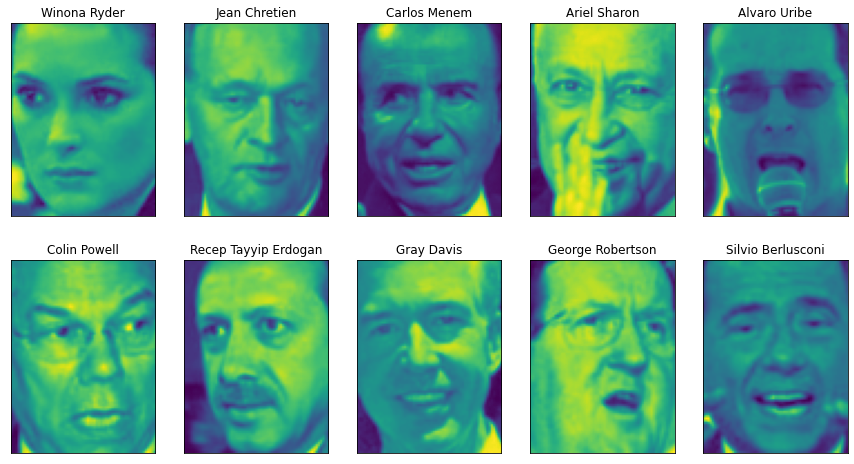

In [13]:
#Check a couple of pictures
fig, axes = plt.subplots(2,5, figsize=(15,8),
                        subplot_kw={'xticks': (),'yticks':()})
for target,image,ax in zip(ppl.target, ppl.images, axes.ravel()):
    ax.imshow(image,cmap='viridis')
    ax.set_title(ppl.target_names[target])

In [14]:
cnts = np.bincount(ppl.target)
cnts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [15]:
X=ppl.data
y = ppl.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn is: ",knn.score(X_test,y_test))


Test set score of 1-nn is:  0.3253968253968254


In [18]:
### SVM model ###
from sklearn.svm import LinearSVC
lsvm = LinearSVC(random_state=0)
lsvm.fit(X_train, y_train)
lsvm.score(X_test, y_test)


/home/parimala/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5661375661375662

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=0)
dt_params = {'max_depth':range(1,10)}
image_dt = GridSearchCV(dt, dt_params, cv=5)
image_dt.fit(X_train,y_train)
image_dt.score(X_test, y_test)

0.23412698412698413